In [66]:

!pip install plotly
%matplotlib inline
import pandas as pd
import numpy as np

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter 
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='iremoze', api_key='xxxxxxx')


### this is a test with modifictaion 

tensorflow 1.2.1 has requirement html5lib==0.9999999, but you'll have html5lib 0.999 which is incompatible.
tensorflow 1.2.1 has requirement markdown>=2.6.8, but you'll have markdown 2.6.6 which is incompatible.
tensorflow 1.2.1 has requirement protobuf>=3.2.0, but you'll have protobuf 3.0.0b2 which is incompatible.


In [67]:
data = pd.read_csv('/resources/data/last.txt')
data.columns=('a','b')
data.count()

a    2646529
b    2646529
dtype: int64

In [68]:
df= data.drop_duplicates('a')
#df.insert(0, 'co', range(1, 1 + len(df)))
#df.head()
df

,a,b
0,2287705,15
1,2287706,19
2,2287707,25
3,2287708,18
4,2287709,18
5,2287710,23
6,2287711,21
7,2287712,29
8,2287713,16
9,2287714,18


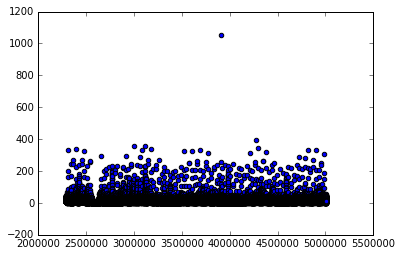

In [69]:
x = df['a']
y= df['b']
plt.scatter(x,y);

In [70]:
y =  df.iloc[:, :-1].values #Şayet X = dataset.iloc[:,0] deseydik yine de X’e ilk sütun olan Kidem sütununu atamış olurduk ancak veri yapısı vektör olurdu.
X = df.iloc[:, 1].values
y

array([[2287705],
       [2287706],
       [2287707],
       ..., 
       [5011197],
       [5011198],
       [5011199]])

In [71]:
#değişkenleri eğitim ve test olmak üzere ikiye bölme
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [72]:
X_train = X_train.reshape(-1,1) 

In [73]:
#modeli eğitme
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [74]:
#fit () metdou ile eğitme yapılacak
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
X_test = X_test.reshape(-1,1)
y_pred = regressor.predict(X_test)
y_pred

array([[ 3676261.12571943],
       [ 3681550.49016457],
       [ 3678150.18444983],
       ..., 
       [ 3678150.18444983],
       [ 3678905.807942  ],
       [ 3677016.74921159]])

In [76]:
y_test

array([[3109135],
       [4357129],
       [2738413],
       ..., 
       [2828197],
       [3970985],
       [4526409]])

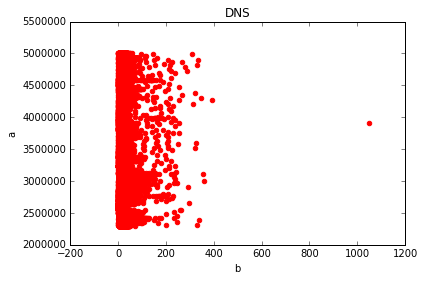

In [77]:
plt.scatter( X_train, y_train, color = 'red')
plt.title('DNS')
plt.xlabel('b')
plt.ylabel('a')
plt.show()

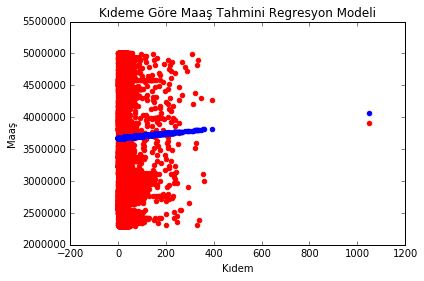

In [79]:
plt.scatter(X_train, y_train, color = 'red')
modelin_tahmin_ettigi_y = regressor.predict(X_train)
plt.scatter(X_train, modelin_tahmin_ettigi_y, color = 'blue')
plt.title('Kıdeme Göre Maaş Tahmini Regresyon Modeli')
plt.xlabel('Kıdem')
plt.ylabel('Maaş')
plt.show()

In [ ]:
#http://www.datascience.istanbul/2017/06/13/basit-regresyon-python-ile-uygulama/